# Perceptron Implementation on the MNIST Dataset

In [51]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [52]:
mnist = load_digits()
mnist.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [53]:
mnist.target

array([0, 1, 2, ..., 8, 9, 8])

In [54]:
#Choose only two classes
class_1 = 1
class_0 = 7

selected_data = mnist.data[(mnist.target == class_1) | (mnist.target == class_0)]
selected_target = mnist.target[(mnist.target == class_1) | (mnist.target == class_0)]
selected_target1 = (selected_target == class_1).astype(int)  #convert the labels to 0 or 1

In [55]:
X_train, X_test, y_train, y_test = train_test_split(selected_data, selected_target1, test_size=0.3, random_state=42)

In [56]:
class Perceptron:

    def __init__(self, alpha=0.01, N=1000):
        self.alpha = alpha
        self.N = N
        self.activation_func = self.step_function
        self.weights = None
        self.intercept = None
        
    def step_function(self, x):
        return np.where(x >= 0 , 1, 0)


    def fit(self, X, y):
        n_samples, n_features = X.shape

        #init parameters
        self.weights = np.zeros(n_features)
        self.intercept = 0

        y_ = np.where(y > 0 , 1, 0)

        #learn weights
        for _ in range(self.N):
            for i, xi in enumerate(X):
                linear_output = np.dot(xi, self.weights) + self.intercept
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.alpha * (y_[i] - y_predicted)
                self.weights += update * xi
                self.intercept += update


    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.intercept
        y_predicted = self.activation_func(linear_output)
        return y_predicted

In [57]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

p = Perceptron(alpha=0.01, N=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy", accuracy(y_test, predictions))

Perceptron classification accuracy 0.9908256880733946


# Hyperparameters

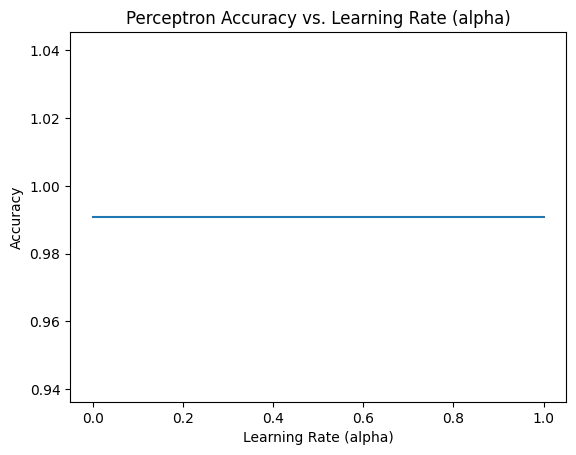

In [58]:
import matplotlib.pyplot as plt

alpha_values = [0.0001, 0.001, 0.01, 0.1, 1]
accuracies = []

for alpha in alpha_values:
    p = Perceptron(alpha=alpha, N=1000)
    p.fit(X_train, y_train)
    predictions = p.predict(X_test)
    acc = accuracy(y_test, predictions)
    accuracies.append(acc)

plt.plot(alpha_values, accuracies)
plt.title('Perceptron Accuracy vs. Learning Rate (alpha)')
plt.xlabel('Learning Rate (alpha)')
plt.ylabel('Accuracy')
plt.show()

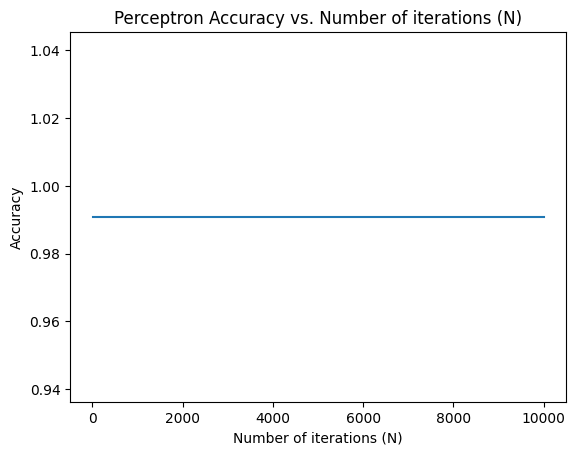

In [59]:
import matplotlib.pyplot as plt

N_values = [10, 100, 1000, 10000]
accuracies = []

for N in N_values:
    p = Perceptron(alpha=0.001, N=N)
    p.fit(X_train, y_train)
    predictions = p.predict(X_test)
    acc = accuracy(y_test, predictions)
    accuracies.append(acc)

plt.plot(N_values, accuracies)
plt.title('Perceptron Accuracy vs. Number of iterations (N)')
plt.xlabel('Number of iterations (N)')
plt.ylabel('Accuracy')
plt.show()